## <a id="libLib"> Importing and Using Libraries </a> 

<p style="text-align: right; font-size: 10px;"><a href="#top">Go to top</a></p>


### Packages

Python has a large standard library, commonly cited as one of Python's greatest strengths, providing tools suited to many tasks. As of May, 2017, the official repository containing third-party software for Python, contains over 107,000 packages.

A *package* is a collection of *modules* i.e. groups of function, classes, constants, types, etc.

To use a module, you have to *import* it using the command <tt>import</tt>.


In [1]:
import math

You can now use it in the code by using the prefix <tt>package_name.</tt>

In [2]:
x = math.cos(2 * math.pi)

print(x)

1.0


To explore the function and other content of the library:
 * Use the web documentation (e.g. for the <tt>math</tt> library <a href="https://docs.python.org/3/library/math.html">Doc for Python 3</a>)
 * Use the built-in <tt>help</tt>

In [ ]:
help(math)

Help on module math:

NAME
    math

MODULE REFERENCE
    https://docs.python.org/3.7/library/math
    
    The following documentation is automatically generated from the Python
    source files.  It may be incomplete, incorrect or include features that
    are considered implementation detail and may vary between Python
    implementations.  When in doubt, consult the module reference at the
    location listed above.

DESCRIPTION
    This module is always available.  It provides access to the
    mathematical functions defined by the C standard.

FUNCTIONS
    acos(x, /)
        Return the arc cosine (measured in radians) of x.
    
    acosh(x, /)
        Return the inverse hyperbolic cosine of x.
    
    asin(x, /)
        Return the arc sine (measured in radians) of x.
    
    asinh(x, /)
        Return the inverse hyperbolic sine of x.
    
    atan(x, /)
        Return the arc tangent (measured in radians) of x.
    
    atan2(y, x, /)
        Return the arc tangent (measured

In [ ]:
help(math.sqrt)

Help on built-in function sqrt in module math:

sqrt(x, /)
    Return the square root of x.



Using the prefix <tt>package_name.</tt> can make the code obfuscated as it can get quite verbose (e.g. <tt>scipy.optimize.minimize</tt>) so Python provides simpler ways to import:
* <tt>**import** package_name **as** nickname</tt> : the prefix to call is now <tt>nickname.</tt>

In [3]:
import math as m

print(m.pi)

3.141592653589793


* <tt>**from** package_name **import** function1,constant1</tt> : <tt>function1</tt> <tt>constant1</tt> can now be called directly. You can even import all contents with <tt>**from** package_name **import** \*</tt> but this may be dangerous as names may conflict or override former ones, it is thus not advised except on user-generated modules.

In [4]:
from math import e,log

print(log(e**4))

4.0


## <a id="libNum"> Numpy and Matplotlib </a> 

<p style="text-align: right; font-size: 10px;"><a href="#top">Go to top</a></p>


**Numpy** is a numerical calculus and algebra package that is widely used, notably providing the *array* (vector/matrix format) type used in almost all numerical projects. <a href="https://docs.scipy.org/doc/numpy-dev/reference/">Documentation</a>


**Matplotlib** is a module for generating 2D and 3D graphics. <a href="https://matplotlib.org/api/pyplot_summary.html">Documentation</a>


It is common to import them with the respective nicknames **np** and **plt** (for <tt>matplotlib.pyplot</tt>). In Notebooks, it is common to add the *Jupyter magic* command <tt>%matplotlib inline</tt> to display the plots inside the notebook.


In [7]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

### Numpy *arrays*

In Numpy, the type *array* is used for vector, matrices, tensors (a matrix type also exists but is more seldomly used).

Numpy arrays can be defined either directly from a list or outputted by a function.


#### One-dimensional arrays

In [9]:
x = np.array([1, 2.5, 5, 10])
print(x,type(x))

[ 1.   2.5  5.  10. ] <class 'numpy.ndarray'>


In [10]:
y = np.random.rand(4)
print(y,type(y))

[0.51682142 0.34744407 0.69661144 0.32803981] <class 'numpy.ndarray'>


#### Plotting

Visualizing the data is quite simple with pyplot:
* Initialize a figure with <tt>plt.figure()</tt>
* Plot something with ... <tt>plt.<a href="https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot">plot</a></tt>
* Fix labels, titles, axes
* Eventually save the result
* Show the figure with <tt>plt.show()</tt>

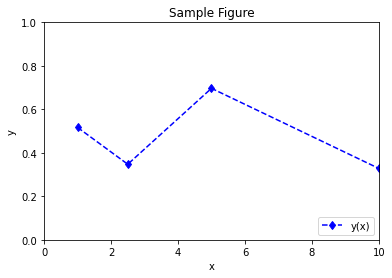

In [11]:
plt.figure()
plt.plot(x,y, 'bd--', label='y(x)')
plt.legend(loc='lower right')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Sample Figure')
plt.xlim([0, 10])
plt.ylim([0, 1])
plt.savefig('sample.png')
plt.show()

#### Matrices

The same process can be used to define matrices.

In [19]:
M = np.array([[0.25, 6.2, 1, 10],[12, 6.2, 6, -5.3]])
print(M,type(M))

[[ 0.25  6.2   1.   10.  ]
 [12.    6.2   6.   -5.3 ]] <class 'numpy.ndarray'>


<div class="warn">**Warning:** the vector and matrix share the same type so there are some caveats! </div>

* The <tt>size</tt> of an array is the number of elements while the <tt>shape</tt> gives how they are arranged.

In [20]:
print(x.size)  # or equivalently np.size(x)
print(M.size)

4
8


In [21]:
print(x.shape)  # or equivalently np.shape(x)
print(M.shape)

(4,)
(2, 4)


* The element access, assignment, type, copy is common and similar to the list type.

In [22]:
print(x)
print(x[2],x[-1])
print(x[::-1])
x[0] = 6.1554
print(x)

[ 1.   2.5  5.  10. ]
5.0 10.0
[10.   5.   2.5  1. ]
[ 6.1554  2.5     5.     10.    ]


In [16]:
v = x
w = np.copy(x) 
print(v)
x[0]=1
print(v)
print(w)

[ 6.1554  2.5     5.     10.    ]
[ 1.   2.5  5.  10. ]
[ 6.1554  2.5     5.     10.    ]


In [17]:
print(M)
print(M[1,2],type(M[1,2]))
print(M[1,:],type(M[1,:]),M[1,:].shape)
print(M[1])
print(M[:,0])

[[ 0.25  6.2   1.   10.  ]
 [12.    6.2   6.   -5.3 ]]
6.0 <class 'numpy.float64'>
[12.   6.2  6.  -5.3] <class 'numpy.ndarray'> (4,)
[12.   6.2  6.  -5.3]
[ 0.25 12.  ]


Advanced access to content and modification is possible

In [18]:
x = np.array([1, 2.5, 5, 10])
ind = [0,2,3]
print(x[ind])

[ 1.  5. 10.]


### Numpy array generation

See the corresponding <a href="https://docs.scipy.org/doc/numpy-dev/reference/routines.array-creation.html">documentation</a>.

#### Number sequences

<br/>

<tt>**arange**</tt> returns an array of evenly spaced number from <tt>start</tt> to (at most) <tt>stop</tt> with a fixed jump <tt>step</tt> <br/>

<tt>**linspace**</tt> returns an array of evenly spaced number from <tt>start</tt> to (exactly) <tt>stop</tt> with a fixed number of points <tt>num</tt>

In [23]:
x = np.arange(0, 10, 1.5)
print(x,type(x))

[0.  1.5 3.  4.5 6.  7.5 9. ] <class 'numpy.ndarray'>


In [24]:
y = np.linspace(0, 10, 25)
print(y,type(y))

[ 0.          0.41666667  0.83333333  1.25        1.66666667  2.08333333
  2.5         2.91666667  3.33333333  3.75        4.16666667  4.58333333
  5.          5.41666667  5.83333333  6.25        6.66666667  7.08333333
  7.5         7.91666667  8.33333333  8.75        9.16666667  9.58333333
 10.        ] <class 'numpy.ndarray'>


#### Zeros and Ones

<br/>

<tt>**zeros**</tt> returns an array (of floats) of zeros  of the precised ** *shape* ** <br/>
<tt>**ones**</tt>  returns an array (of floats) of ones  of the precised ** *shape* ** 
<tt>**eye**</tt>  returns a square 2D-array (of floats) with ones on the diagonal and zeros elsewhere ** *dimension* ** 

In [25]:
x = np.zeros(3)
print(x,x.shape,type(x),x.dtype)

x = np.zeros((3,))
print(x,x.shape,type(x),x.dtype)

[0. 0. 0.] (3,) <class 'numpy.ndarray'> float64
[0. 0. 0.] (3,) <class 'numpy.ndarray'> float64


In [26]:
x = np.zeros((3,3))
print(x,x.shape,type(x),x.dtype)

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]] (3, 3) <class 'numpy.ndarray'> float64


In [27]:
M = np.eye(3)
print(M,M.shape,type(M),M.dtype)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]] (3, 3) <class 'numpy.ndarray'> float64


#### Random data


Random arrays can be generated by Numpy's <a href="https://docs.scipy.org/doc/numpy-dev/reference/routines.random.html"><tt>random</tt></a> module.


<tt>**rand**</tt> returns an array (of floats) of uniformly distributed numbers in [0,1)  of the precised ** *dimensions* ** <br/>
<tt>**randn**</tt>  returns an array (of floats) of numbers from the normal distribution of the precised ** *dimensions* ** <br/>
<tt>**randint**</tt>  returns an array (of floats) of integers from the discrete uniform distribution  <br/>

In [28]:
np.random.rand(5) 

array([0.89714036, 0.18436414, 0.35392012, 0.50759716, 0.57870883])

In [29]:
np.random.randn(5,2)

array([[-0.18615335, -0.6134938 ],
       [ 1.19384548, -0.08974348],
       [-0.58632432,  2.11516646],
       [ 0.11141353,  0.35359306],
       [-0.21949877,  1.88410077]])

In [30]:
np.random.randint(0,100,size=(10,))

array([70, 54, 27, 60, 69, 99, 87, 72, 60,  6])

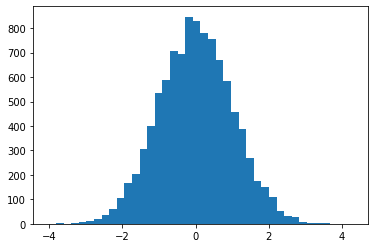

In [31]:
a = np.random.randn(10000)
plt.figure()
plt.hist(a,40) # histogram of a with 40 bins
plt.show()

## <a id="libOp"> Operations on Matrices and vectors </a> 

<p style="text-align: right; font-size: 10px;"><a href="#top">Go to top</a></p>



In [ ]:
v = np.arange(0, 5)
print(v)

[0 1 2 3 4]


In [ ]:
v * 2

array([0, 2, 4, 6, 8])

In [ ]:
v + 2.5

array([2.5, 3.5, 4.5, 5.5, 6.5])

In [ ]:
square = v**2
root = np.sqrt(v)
print(square,root)

[ 0  1  4  9 16] [0.         1.         1.41421356 1.73205081 2.        ]


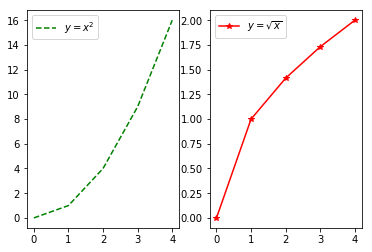

In [ ]:
plt.figure()
plt.subplot(1,2,1)
plt.plot(square,'g--', label='$y = x^2$')
plt.legend(loc=0)
plt.subplot(1,2,2)
plt.plot(root, 'r*-', label='$y = \sqrt{x}$')
plt.legend(loc=2)
plt.show()

In [ ]:
A = np.array([[n+m*10 for n in range(5)] for m in range(4)])
print(A)

[[ 0  1  2  3  4]
 [10 11 12 13 14]
 [20 21 22 23 24]
 [30 31 32 33 34]]


In [ ]:
A*2

array([[ 0,  2,  4,  6,  8],
       [20, 22, 24, 26, 28],
       [40, 42, 44, 46, 48],
       [60, 62, 64, 66, 68]])

In [ ]:
A+2.5

array([[ 2.5,  3.5,  4.5,  5.5,  6.5],
       [12.5, 13.5, 14.5, 15.5, 16.5],
       [22.5, 23.5, 24.5, 25.5, 26.5],
       [32.5, 33.5, 34.5, 35.5, 36.5]])

Matrices can be visualized as images.

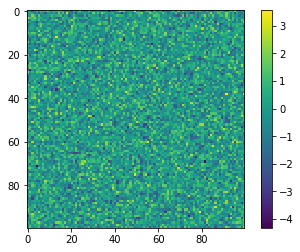

In [ ]:
C = np.random.randn(100,100)
plt.figure()
plt.imshow(C)
plt.colorbar()
plt.show()

### Matrix and vector operations

<br/>

<div class="warn">**Warning:** Operation symbols <tt>+   -   \*  /</tt> correspond to *elementwise* operations! To perform, matrix/vector multiplication, dedicated function must be used. </div>

#### Elementwise operations

In [ ]:
A = np.array([[n+m*10 for n in range(5)] for m in range(4)])
v = np.random.randn(5)
print(A,v)

[[ 0  1  2  3  4]
 [10 11 12 13 14]
 [20 21 22 23 24]
 [30 31 32 33 34]] [-0.91636049  1.13296126  1.79491462  0.9749617   0.19167558]


In [ ]:
A*A

array([[   0,    1,    4,    9,   16],
       [ 100,  121,  144,  169,  196],
       [ 400,  441,  484,  529,  576],
       [ 900,  961, 1024, 1089, 1156]])

In [ ]:
v*v

array([0.83971655, 1.28360122, 3.22171849, 0.95055031, 0.03673953])

In [ ]:
A*v

array([[ -0.        ,   1.13296126,   3.58982924,   2.92488509,
          0.7667023 ],
       [ -9.16360494,  12.46257388,  21.53897542,  12.67450204,
          2.68345805],
       [-18.32720988,  23.79218649,  39.4881216 ,  22.42411899,
          4.60021381],
       [-27.49081481,  35.12179911,  57.43726778,  32.17373594,
          6.51696956]])

#### Transposition

It can be useful to transpose, it is simply done by suffixing <tt>.T</tt> (or equivalently using the function <tt>np.transpose</tt>). Similarly <tt>.H</tt> is the Hermitian conjugate  <tt>.imag</tt>  <tt>.real</tt> the real and imaginary parts <tt>.abs</tt> the modulus (their *full* versions are respectively <tt>np.conjugate</tt> <tt>np.imag</tt> <tt>np.real</tt> <tt>np.abs</tt>)

In [ ]:
print(A,A.shape)
print(A.T,A.T.shape)

[[ 0  1  2  3  4]
 [10 11 12 13 14]
 [20 21 22 23 24]
 [30 31 32 33 34]] (4, 5)
[[ 0 10 20 30]
 [ 1 11 21 31]
 [ 2 12 22 32]
 [ 3 13 23 33]
 [ 4 14 24 34]] (5, 4)


#### Matrix/vector operations

$y=Av$ can be obtained by <tt>y = A.dot(v)</tt> (or equivalently <tt>y = np.dot(A,v)</tt>). This methods works for array with *compatible shape* (matrix-matrix, matrix-vector, vector-matrix, vector-vector, etc).


In [ ]:
y = np.dot(A,v)
print(A,A.shape,v,v.shape)
print(y,type(y),y.shape)

[[ 0  1  2  3  4]
 [10 11 12 13 14]
 [20 21 22 23 24]
 [30 31 32 33 34]] (4, 5) [-0.91636049  1.13296126  1.79491462  0.9749617   0.19167558] (5,)
[  8.41437788  40.19590444  71.97743101 103.75895757] <class 'numpy.ndarray'> (4,)


Example of vector-vector multiplication i.e. a scalar product

In [ ]:
s = v.dot(v)
print(v, s, type(s))

[-0.91636049  1.13296126  1.79491462  0.9749617   0.19167558] 6.332326093862193 <class 'numpy.float64'>


In [ ]:
A3 = np.dot(A,A.T)
print(A3,A3.shape)

[[  30  130  230  330]
 [ 130  730 1330 1930]
 [ 230 1330 2430 3530]
 [ 330 1930 3530 5130]] (4, 4)


From a vector $v$, one can form the matrix $P=v v^T$ by <tt>A=v.outer(v)<tt> (or equivalently <tt>np.outer(v,v)</tt>)

In [ ]:
P = np.outer(v,v)
print(P)

[[ 0.83971655 -1.03820094 -1.64478885 -0.89341638 -0.17564392]
 [-1.03820094  1.28360122  2.03356873  1.10459383  0.217161  ]
 [-1.64478885  2.03356873  3.22171849  1.749973    0.34404129]
 [-0.89341638  1.10459383  1.749973    0.95055031  0.18687634]
 [-0.17564392  0.217161    0.34404129  0.18687634  0.03673953]]


### Useful Functions

See the Documentation on <a href="https://docs.scipy.org/doc/numpy/reference/arrays.ndarray.html">arrays</a> and <a href="https://docs.scipy.org/doc/numpy/reference/routines.array-creation.html">array creation</a>.

<div class="warn">**Warning:** Modificators such as transpose, reshape, etc. do not modify the matrix, if you want to keep the result of the operation, you have to assign a variable to it. The notable exceptions are precised as *in-place* in the documentation.</div>

In [ ]:
A.reshape((2,10))

array([[ 0,  1,  2,  3,  4, 10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24, 30, 31, 32, 33, 34]])

In [ ]:
print(A)

[[ 0  1  2  3  4]
 [10 11 12 13 14]
 [20 21 22 23 24]
 [30 31 32 33 34]]


In [ ]:
B = A.flatten()
print(B)

[ 0  1  2  3  4 10 11 12 13 14 20 21 22 23 24 30 31 32 33 34]


In [ ]:
print(A.trace(),A.max(),A.argmax())

66 34 19


Some functions may be taken with respects to the columns with <tt>axis=0</tt> or lines with <tt>axis=1</tt>.

In [ ]:
print(A.mean(),A.mean(axis=0),A.mean(axis=1))

17.0 [15. 16. 17. 18. 19.] [ 2. 12. 22. 32.]


In [ ]:
print(A.var(),A.var(axis=0),A.std(axis=1))

127.0 [125. 125. 125. 125. 125.] [1.41421356 1.41421356 1.41421356 1.41421356]


#### Repetition, tiling, concatenation

In [ ]:
a = np.array([[1, 2], [3, 4]])
a

array([[1, 2],
       [3, 4]])

In [ ]:
# repeat each element 3 times
np.repeat(a, 3) #  1-d result

array([1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4])

In [ ]:
# repeat *the matrix* 3 times
np.tile(a, 3)

array([[1, 2, 1, 2, 1, 2],
       [3, 4, 3, 4, 3, 4]])

In [ ]:
b = np.array([[5, 6]])

In [ ]:
np.concatenate((a, b), axis=0)

array([[1, 2],
       [3, 4],
       [5, 6]])

In [ ]:
np.concatenate((a, b.T), axis=1)

array([[1, 2, 5],
       [3, 4, 6]])

In [ ]:
np.vstack((a,b))

array([[1, 2],
       [3, 4],
       [5, 6]])

In [ ]:
np.hstack((a,b.T))

array([[1, 2, 5],
       [3, 4, 6]])

### Iterating on arrays

In [ ]:
v = np.array([1,2,3,4])

for element in v:
    print(element)

1
2
3
4


In [ ]:
a = np.array([[1,2], [3,4]])

for row in a:
    print("row", row)
    
    for element in row:
        print(element)

row [1 2]
1
2
row [3 4]
3
4


<tt>enumerate</tt> can be used to get indexes along with elements.

In [ ]:
for row_idx, row in enumerate(a):
    print("row_idx", row_idx, "row", row)
    
    for col_idx, element in enumerate(row):
        print("col_idx", col_idx, "element", element)
       
        # update the matrix a: square each element
        a[row_idx, col_idx] = element ** 2

row_idx 0 row [1 2]
col_idx 0 element 1
col_idx 1 element 2
row_idx 1 row [3 4]
col_idx 0 element 3
col_idx 1 element 4


In [ ]:
a

array([[ 1,  4],
       [ 9, 16]])